In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import corner
from gw_from_binary import *
from chainconsumer import ChainConsumer 

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] #+ plt.rcParams["font.serif"]
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(5,3.5)
plt.rcParams["xtick.direction"]="in"
plt.rcParams["ytick.direction"]="in"
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['legend.handlelength'] = 1.2
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.columnspacing'] = 0.5
plt.rcParams['legend.framealpha'] = 0.9
from model_file import *

ModuleNotFoundError: No module named 'ptarcade'

In [5]:
M_all,q_all,z_all = np.load("edges_M40_Q21_Z22_holov1p6_SAM_NANO15Astro.npy",allow_pickle=True)
dN      = np.load("nden_M40_Q21_Z22_holov1p6_SAM_NANO15Astro.npy",allow_pickle=True)

(39,) (20,) (21,)
(39, 20, 21)


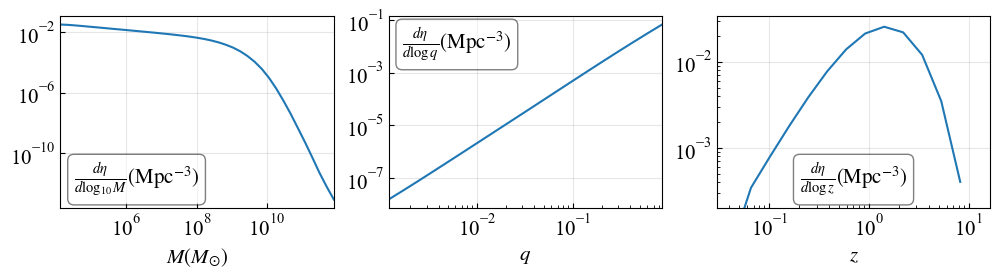

In [ ]:


print(M_all.shape , q_all.shape , z_all.shape)
print(dN.shape)

plt.subplots(1,3,figsize=(12,2.5))
plt.subplot(1,3,1)
val = np.trapz(np.trapz(dN , q_all , axis=1 ) , z_all , axis=1 )
plt.loglog(M_all , val)
plt.xlabel(r"$M(M_{\odot})$")
#plt.title(r"$\frac{d \eta}{d\log_{10}M}({\rm Mpc}^{-3})$")
plt.annotate(r"$\frac{d \eta}{d\log_{10}M}({\rm Mpc}^{-3})$" , xycoords="axes fraction" , xy=(0.05,0.05) , va='bottom' \
             ,bbox=dict(facecolor='white', alpha=0.5, boxstyle='round' ))
plt.xlim(M_all.min(),M_all.max())


plt.subplot(1,3,2)
val = np.trapz(np.trapz(dN , np.log10(M_all) , axis=0 ) , z_all , axis=1 )*q_all 
plt.loglog(q_all , val )
plt.xlabel(r"$q$")
#plt.title(r"$\frac{d \eta}{d \logq}{\rm Mpc}^{-3}$")
plt.annotate(r"$\frac{d \eta}{d \log q}({\rm Mpc}^{-3})$" , xycoords="axes fraction" , xy=(0.05,0.95) , va='top' \
             ,bbox=dict(facecolor='white', alpha=0.5, boxstyle='round' ))
plt.xlim(q_all.min(),q_all.max())

plt.subplot(1,3,3)
val = np.trapz(np.trapz(dN , np.log10(M_all) , axis=0 ) , q_all , axis=0 )*z_all 
plt.loglog(z_all ,val)
plt.xlabel(r"$z$")
#plt.title(r"$\frac{d \eta}{d\log z}{\rm Mpc}^{-3}$")
plt.annotate(r"$\frac{d \eta}{d\log z}({\rm Mpc}^{-3})$" , xycoords="axes fraction" , xy=(0.50,0.05) , va='bottom' ,ha='center' \
             ,bbox=dict(facecolor='white', alpha=0.5, boxstyle='round' ) )
plt.xlim(3e-2,z_all.max()*2)
plt.ylim(2e-4)

plt.savefig("dn.pdf",bbox_inches='tight')

In [4]:
from chainconsumer import ChainConsumer 

chain =  np.loadtxt("./chains/SGWB_all/chain_0/chain_1.txt",skiprows=10000)
chain[:,2] = chain[:,2]-1
chain[:,3] = chain[:,3]-1
print(chain.shape)


(193900, 8)


WARNING  Parameter $e_0$ in chain NANOGrav 15yr, 5 frequencies is not constrained

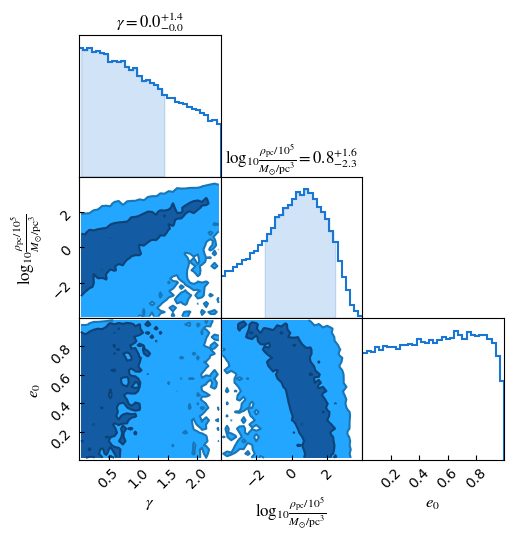

In [5]:
ch = ChainConsumer()
plt.rcParams['axes.grid'] = False

param_names= [r"$\log_{10}{\rm Norm}$",\
              r"$\log_{10}\frac{\rho_{\rm pc}/10^5}{M_{\odot}/{\rm pc}^3 }$",\
                r"$\gamma$",r"$e_0$"]
ch.add_chain( chain[:,:-4] , \
            parameters=param_names ,name =r'NANOGrav 15yr, 5 frequencies')
ch.configure(
             shade_alpha=[1],\
                sigmas=np.array([0,39.35/68.27,86.47/95.45*2]),\
                    shade=True,linewidths=1.5,tick_font_size=10,summary=True\
                        ,colors=["blue"],smooth=0)


ch.plotter.plot(parameters=[param_names[2],param_names[1],param_names[3] ],figsize=(5,5));
plt.subplots_adjust(wspace=0.0, hspace=0.00)
plt.savefig("corners.pdf",bbox_inches='tight')

168100 166900 167700


WARNING  Parameter $\gamma$ in chain $e_0 = 0.5$ is not constrained

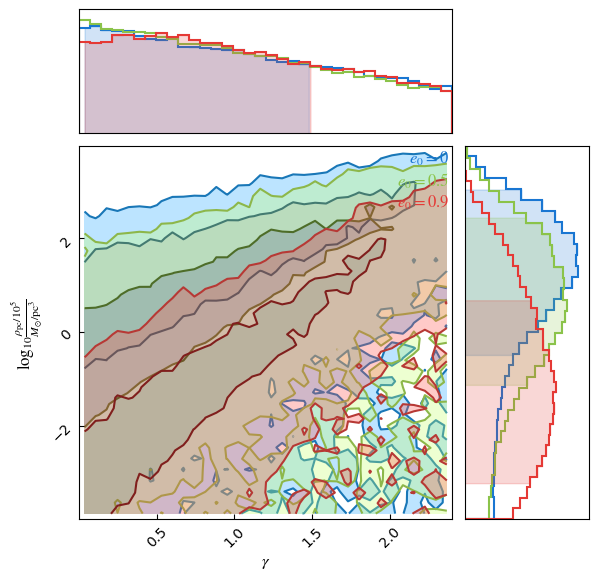

In [6]:
chain1 = np.loadtxt("chains/SGWB_e00/chain_0/chain_1.txt",skiprows=20000)  ; chain1[:,2] = chain1[:,2]-1;chain1[:,3] = chain1[:,3]-1 ; 
chain2 = np.loadtxt("chains/SGWB_e05/chain_0/chain_1.txt",skiprows=20000) ;chain2[:,2] = chain2[:,2]-1;chain2[:,3] = chain2[:,3]-1  ; 
chain3 = np.loadtxt("chains/SGWB_e09/chain_0/chain_1.txt",skiprows=20000) ; chain3[:,2] = chain3[:,2]-1;chain3[:,3] = chain3[:,3]-1 ;

print(len(chain1),len(chain2),len(chain3))
ch = ChainConsumer()
param_names= [r"$\log_{10}{\rm Norm}$",\
              r"$\log_{10}\frac{\rho_{\rm pc}/10^5}{M_{\odot}/{\rm pc}^3 }$",\
                r"$\gamma$",r"$e_0$"]
ch.add_chain( chain1[:,:-4] , \
            parameters=param_names ,name =r'$e_0 = 0$')
ch.add_chain( chain2[:,:-4] , \
            parameters=param_names ,name =r'$e_0 = 0.5$')
ch.add_chain( chain3[:,:-4] , \
            parameters=param_names ,name =r'$e_0 = 0.9$')

ch.configure(
             shade_alpha=[0.3,0.3,0.3],\
                sigmas=np.array([0,39.35/68.27,86.47/95.45*2]),\
                    shade=True,linewidths=1.5 ,smooth=0)
ch.plotter.plot(parameters=[param_names[2],param_names[1]],legend=True,figsize=(6,6));

# results: fix $e_{\rm inf}$

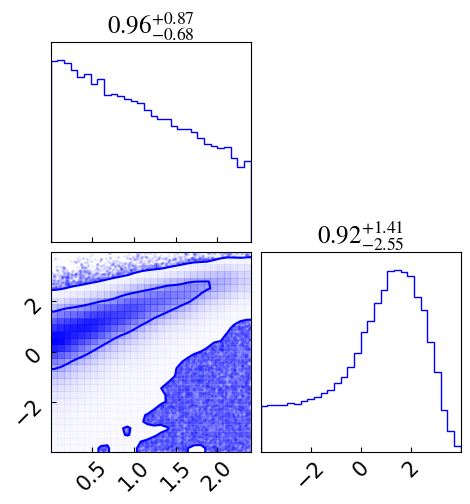

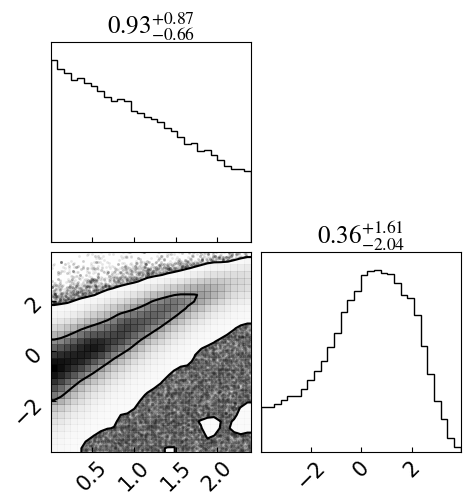

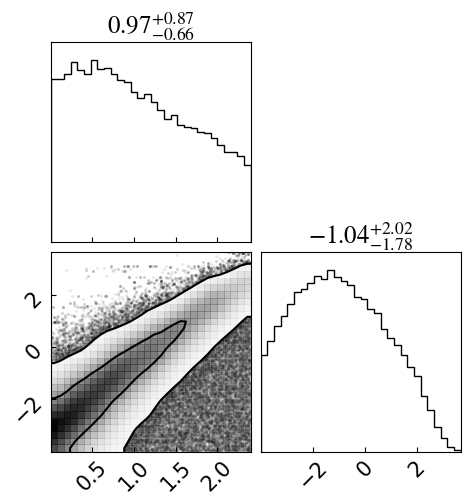

In [8]:

c1 = corner.corner(chain1[:,[2,1]], levels=[0.393, 0.865],bins=30, show_titles=True, smooth=1, color="blue")
c2 = corner.corner(chain2[:,[2,1]], levels=[0.393, 0.865],bins=30, show_titles=True, smooth=1)
c3 = corner.corner(chain3[:,[2,1]], levels=[0.393, 0.865],bins=30, show_titles=True, smooth=1)

(-4.0, 4.0)

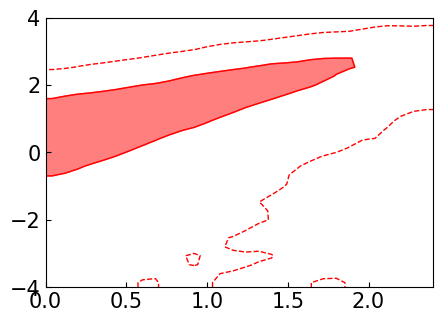

In [9]:
cc = c1.get_axes()[2]
cc1=cc.collections[2]
for ccc in cc1.get_paths():
    plt.plot(ccc.vertices[:,0] ,ccc.vertices[:,1] , color="red" , linestyle="--" ,lw=1)
cc1=cc.collections[3]
i = 0 
for ccc in cc1.get_paths():
    if i ==0:
        label = r"$e_0=0.9$"
    else:
        label = ""
    plt.plot(ccc.vertices[:,0] ,ccc.vertices[:,1] , color="red" ,lw=1,label=label)
    plt.fill(ccc.vertices[:,0] ,ccc.vertices[:,1] ,color="red",alpha=0.5)
    i+= 1
plt.xlim(0,2.4)
plt.ylim(-4,4)

## Violins

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import natpy as nat
import la_forge.core as co

def load_violins(correlations=False):
    
    path = "violins/" #change to path of the violins files
    # load data file
    if (correlations):   
        c0 = co.Core(corepath=path+"30fCP_30fiRN_3A.core")
        labels = [p for p in c0.params if 'gw_hd' in p]
        
    else:
        c0 = co.Core(corepath=path+"30fCP_30fiRN_2A.core")
        labels = [p for p in c0.params if 'rho' in p]

    freqs = c0.rn_freqs  # array of frequencies

    # load free spec samples
    viol = c0(labels)  # this is now a numpy array of Nsamples x Nfreq 

    dfreq = np.diff(np.concatenate((np.array([0]), freqs[::1])))

    H_0byh= 100 * nat.convert(nat.km * nat.s**-1 * nat.Mpc**-1, nat.Hz) # H_0/h in Hz
    h2_omega_viol = np.log10(24*np.pi**4 * (10**viol)**2 * 1/np.repeat(dfreq,1) *freqs**5/(3*H_0byh**2))
    return h2_omega_viol, freqs


def plot_violins(ax, h2_omega_viol, N_f=30, border='silver'):
    
    Tspan = 505861299.1401644
    freqs = np.arange(1,31) / Tspan

    H_0byh= 100 * nat.convert(nat.km * nat.s**-1 * nat.Mpc**-1, nat.Hz) # H_0/h in Hz
    hc_viol = np.log10( np.sqrt( 10**h2_omega_viol[:,:N_f] * 3 * H_0byh**2 / 2 / np.pi**2 / freqs[None,:N_f]**2 ) )

    v1 = ax.violinplot(
        hc_viol, 
        positions=np.log10(freqs[:N_f]), 
        widths=0.1,
        showextrema=False)

    # v1 = ax.violinplot(
    #     h2_omega_viol[:,:N_f], 
    #     positions=np.log10(freqs[:N_f]), 
    #     widths=0.05,
    #     showextrema=False)

    for pc in v1['bodies']:
        pc.set_facecolor('silver')
        pc.set_edgecolor(border)
        pc.set_linestyle('solid')
            
    return

h2_omega_viol, freqs = load_violins(correlations=True)

0.08257799090659979 1.2960577445298957
0.0641121458570666 -0.08933272511049761
0.271275542408 -1.896370174501646
-52.51443
-52.558455
-52.560318


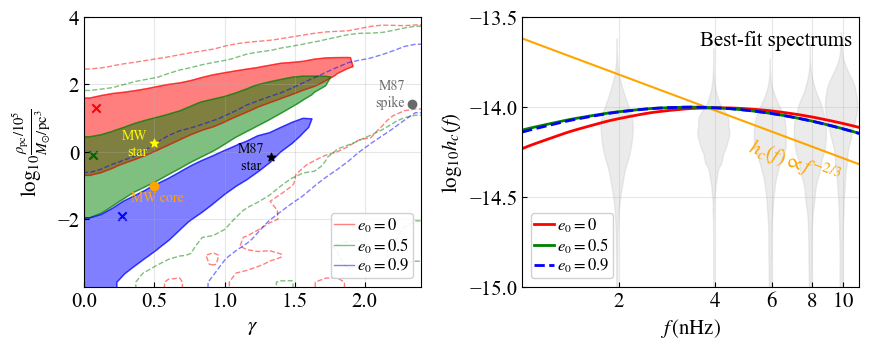

In [81]:
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(10,3.5))
ax = plt.subplot(1,2,1)
cc = c1.get_axes()[2]
cc1=cc.collections[2]
for ccc in cc1.get_paths():
    plt.plot(ccc.vertices[:,0] ,ccc.vertices[:,1] , color="red" , linestyle="--" ,lw=1,alpha=0.5)
cc1=cc.collections[3]
i = 0 
for ccc in cc1.get_paths():
    if i ==0:
        label = r"$e_0=0$"
    else:
        label = ""
    plt.plot(ccc.vertices[:,0] ,ccc.vertices[:,1] , color="red" ,lw=1,label=label,alpha=0.5)
    plt.fill(ccc.vertices[:,0] ,ccc.vertices[:,1] ,color="red",alpha=0.5)
    i+= 1
params = chain1[chain1[:,-3].argmax(),:]
plt.scatter(params[2],params[1],color="red",marker="x")
print(params[2],params[1])



cc = c2.get_axes()[2]
cc1 = cc.collections[0]
for ccc in cc1.get_paths():
    plt.plot(ccc.vertices[:,0] ,ccc.vertices[:,1] , color="green" , linestyle="--" ,lw=1,alpha=0.5)
cc1=cc.collections[3]
i = 0 
for ccc in cc1.get_paths():
    if i ==0:
        label = r"$e_0=0.5$"
    else:
        label = ""
    plt.plot(ccc.vertices[:,0] ,ccc.vertices[:,1] , color="green" ,lw=1,label=label,alpha=0.5)
    plt.fill(ccc.vertices[:,0] ,ccc.vertices[:,1] ,color="green",alpha=0.5)
    i+= 1
params = chain2[chain2[:,-3].argmax(),:]
plt.scatter(params[2],params[1],color="darkgreen",marker="x")
print(params[2],params[1])

cc = c3.get_axes()[2]
cc1=cc.collections[2]
for ccc in  cc1.get_paths():
    plt.plot(ccc.vertices[:,0] ,ccc.vertices[:,1] , color="blue" , linestyle="--" ,lw=1,alpha=0.5)
cc1=cc.collections[3]
i = 0 
for ccc in cc1.get_paths():
    if i ==0:
        label = r"$e_0=0.9$"
    else:
        label = ""
    plt.plot(ccc.vertices[:,0] ,ccc.vertices[:,1] , color="blue" ,lw=1,label=label,alpha=0.5)
    plt.fill(ccc.vertices[:,0] ,ccc.vertices[:,1] ,color="blue",alpha=0.5)
    i+=1
params = chain3[chain3[:,-3].argmax(),:]
plt.scatter(params[2],params[1],color="blue",marker="x")
print(params[2],params[1])


plt.xlim(0,2.4)
plt.ylim(-4+0.0001,4)
plt.legend(loc='lower right')
plt.xlabel(r"$\gamma$",size=15)
plt.ylabel(r"$\log_{10}\frac{\rho_{\rm pc}/10^5}{M_{\odot}/{\rm pc}^3 }$",size=15)


plt.scatter([0.5],[np.log10(1.8)],color="yellow",zorder=10,marker="*")
plt.annotate("MW\nstar",xy=(0.5-0.05,np.log10(1.8)),color="yellow",size=10,ha='right',va='center')

plt.scatter([0.5],[np.log10(0.1)],color="orange",zorder=10)
plt.annotate("MW core",color="orange",xy=(0.5+0.02,np.log10(0.1)-0.15),size=10,ha='center',va='top')

plt.scatter([4/3],[np.log10(0.7)],color="k",zorder=10,marker="*")
plt.annotate("M87\nstar ",xy=(4/3-0.05,np.log10(0.7)),color="k",size=10,ha='right',va='center')

plt.scatter([7/3],[np.log10(26)],color="dimgray",zorder=10)
plt.annotate("M87\nspike",xy=(7/3-0.05,np.log10(26)+0.3),color="dimgray",size=10,ha='right',va='center')



ax=plt.subplot(1,2,2)
from model_file import get_SGWB_from_tab_interp
fgw = np.logspace(-9,-7.95,51)
hc0 = 2.4e-15 * ( fgw * 31536000.0 )**(-2/3)
plt.plot(np.log10(fgw) , np.log10(hc0) , 'orange' )
plt.annotate(r"$h_c(f) \propto f^{-2/3}$",xy=(-8,-14.15),rotation=-20,va='top',ha='right',color='orange')


# e=0 
params = chain1[chain1[:,-3].argmax(),:]
hc = get_SGWB_from_tab_interp( 10**params[1] ,params[2] ,params[3] , fgw ) * np.sqrt(10**params[0])
plt.plot(np.log10(fgw),np.log10(hc),label=r"$e_0=%.0f$"%(params[3]),color="red",lw=2)
print(chain1[:,-3].max())

# e=0.5
params = chain2[chain2[:,-3].argmax(),:]
hc = get_SGWB_from_tab_interp( 10**params[1] ,params[2] ,params[3]  , fgw )* np.sqrt(10**params[0])
plt.plot(np.log10(fgw),np.log10(hc),label=r"$e_0=%.1f$"%(params[3]),color="green",lw=2)
print(chain2[:,-3].max())

# e=0.9
params = chain3[chain3[:,-3].argmax(),:]
hc = get_SGWB_from_tab_interp( 10**params[1] ,params[2] ,params[3]  , fgw )* np.sqrt(10**params[0])
plt.plot(np.log10(fgw),np.log10(hc),label=r"$e_0=%.1f$"%(params[3]),color="blue",lw=2,ls="--")
print(chain3[:,-3].max())

plt.annotate(r"Best-fit spectrums",xy=(0.98,0.95),xycoords="axes fraction",va='top',ha='right')
#plt.legend(loc='upper right',bbox_to_anchor=(1,0.9))
plt.legend(loc='lower left')

plt.grid(True,which='both')
plt.xlabel(r"$f\,({\rm nHz})$ ",size=15)
plt.ylabel(r"$\log_{10}h_c(f)$",size=15)

plt.xlim(-9,np.log10(fgw).max())
plot_violins(ax, h2_omega_viol,N_f=5)
plt.xticks(np.log10([2e-9,4e-9,6e-9,8e-9,1e-8]),[r"$2$",r"$4$",r"$6$",r"$8$",r"$10$"])
plt.ylim(-15,-13.5)
plt.yticks([-15,-14.5,-14,-13.5])

plt.subplots_adjust(wspace=0.3)
plt.savefig("result_e0.pdf",bbox_inches='tight',)

# Best-fits